# Deep Learning Lesson 1: MNIST Classification Version 1

## Using Cloudmesh Common

Here we do a simple benchmark. We calculate compile time, train time, test time and data loading time for this example. 
Installing cloudmesh-common library is the first step. 

In [1]:
!pip install cloudmesh-common

     |████████████████████████████████| 61kB 3.9MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
  Created wheel for python-hostlist: filename=python_hostlist-1.18-cp36-none-any.whl size=38517 sha256=0f63368107e079d5276eacfd1b6dd621128a711a1dc32b1455c29a694e69ac6c
  Stored in directory: /root/.cache/pip/wheels/56/db/1d/b28216dccd982a983d8da66572c497d6a2e485eba7c4d6cba3
  Created wheel for simplejson: filename=simplejson-3.16.0-cp36-cp36m-linux_x86_64.whl size=114025 sha256=e809ca54c790bf24bf93a3a2ab0f03174ac8c3f23a51a9b8cda68c03d9ebff14
  Stored in directory: /root/.cache/pip/wheels/5d/1a/1e/0350bb3df3e74215cd91325344cc86c2c691f5306eb4d22c77
Successfully built python-hostlist simplejson



In this lesson we discuss in how to create a simple IPython Notebook to solve
an image classification problem. MNIST contains a set of pictures


In [2]:
! python3 --version

Python 3.6.8


In [3]:
! pip install tensorflow-gpu==1.14.0

     |████████████████████████████████| 377.0MB 58kB/s 


## Import Libraries 

Note: https://python-future.org/quickstart.html

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import time 

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

from cloudmesh.common.StopWatch import StopWatch


Using TensorFlow backend.


## Pre-process data

### Load data 

First we load the data from the inbuilt mnist dataset from Keras

In [5]:
StopWatch.start("data-load")
(x_train, y_train), (x_test, y_test) = mnist.load_data()
StopWatch.stop("data-load")

11493376/11490434 [==============================] - 1s 0us/step


### Identify Number of Classes

As this is a number classification problem. We need to know how many classes are there. 
So we'll count the number of unique labels. 

In [0]:
num_labels = len(np.unique(y_train))

### Convert Labels To One-Hot Vector

**|Exercise:** Understand what is an one-hot vector? 

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Image Reshaping

The training model is designed by considering the data as a vector.
This is a model dependent modification. Here we assume the image is
a squared shape image.

In [0]:
image_size = x_train.shape[1]
input_size = image_size * image_size

## Resize and Normalize

The next step is to continue the reshaping to a fit into a vector
and normalize the data. Image values are from 0 - 255, so an 
easy way to normalize is to divide by the maximum value. 

**|Execrcise: Suggest another way to normalize the data preserving the accuracy or improving the accuracy.**

In [0]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

## Create a Keras Model

Keras is a neural network library. Most important thing with Keras is the way we design the neural network. 

In this model we have a couple of ideas to understand. 

**|Exercise MNIST_V1.1: Find out what is a dense layer?**

A simple model can be initiated by using an **Sequential** instance in Keras. 
For this instance we add a single layer. 

1. Dense Layer 
2. Activation Layer (Softmax is the activation function)

Dense layer and the layer followed by it is fully connected. 
For instance the number of hidden units used here is 64
and the following layer is a dense layer followed by an activation 
layer.

**|Execrcise MNIST_V1.2: Find out what is the use of an activation function. Find out why, softmax was used as the last layer.**


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


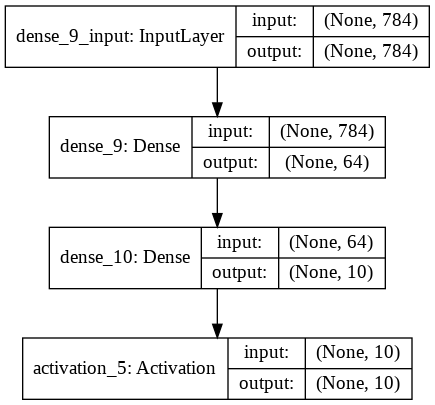

In [20]:
batch_size = 4
hidden_units = 64

model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mnist_v1.png', show_shapes=True)

## Compile and Train

A keras model need to be compiled before it can be used to train
the model. In the compile function, you can provide the optimization
that you want to add, metrics you expect and the type of loss function
you need to use. 

Here we use the adam optimizer, a famous optimizer used in neural networks. 

**Exercise: Find 3 other optimizers used on neural networks.**

The loss funtion we have used is the categorical_crossentropy. 

**Exercise: Find other loss functions provided in keras. Your answer can limit to 1 or more.**

Once the model is compiled, then the fit function is called upon passing the number of epochs,
traing data and batch size. 

The batch size determines the number of elements used per minibatch in optimizing the function. 

**Note: Change the number of epochs, batch size and see what happens.**

**Exercise: Figure out a way to plot the loss function value. You can use any method you like.** 


In [17]:
StopWatch.start("compile")
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
StopWatch.stop("compile")
StopWatch.start("train")
model.fit(x_train, y_train, epochs=1, batch_size=batch_size)
StopWatch.stop("train")

Epoch 1/1
60000/60000 [==============================] - 24s 408us/step - loss: 0.3736 - acc: 0.8937


## Testing 

Now we can test the trained model. Use the evaluate function by passing
test data and batch size and the accuracy and the loss value can be retrieved.

**Exercise: Try to optimize the network by changing the number of epochs, batch size and record the best accuracy that you can gain**

In [18]:
StopWatch.start("test")
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
StopWatch.stop("test")

10000/10000 [==============================] - 2s 178us/step

Test accuracy: 90.8%


In [19]:
StopWatch.benchmark()


+---------------------+------------------------------------------------------------------+
| Machine Attribute   | Value                                                            |
+---------------------+------------------------------------------------------------------+
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.3 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           

## Final Note

This programme can be defined as a hello world programme in deep learning. 
Objective of this exercise is not to teach you the depths of deep learning. 
But to teach you basic concepts that may need to design a simple network to 
solve a problem. Before running the whole code, read all the instructions 
before a code section. Solve all the problems noted in bold text with Exercise keyword.
Write your answers and submit a PDF by following the **Assignment 4**.
Include codes or observations you made on those sections. 


### Reference: 

[Mnist Database](https://en.wikipedia.org/wiki/MNIST_database)

[Advanced Deep Learning Models](https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras)

[Minist Deep Learning](http://deeplearning.net/tutorial/gettingstarted.html)
